In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-30 12:54:15.489743,P2,A1,2020,Academic,Analyze Time,A12020,"Technische Universität, Berlin"
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-30 13:54:15.489743,P2,A1,2020,Academic,Analyze Time,A12020,"Technische Universität, Berlin"
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-30 14:54:15.489743,P2,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University"
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-30 15:54:15.489743,P2,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University"
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-30 16:54:15.489743,P2,A7,2020,Academic,Analyze Time,A72020,German Research Center for Artificial Intellig...
...,...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2022-01-08 19:54:15.489743,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2022-01-08 20:54:15.489743,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2022-01-08 21:54:15.489743,P1,A19,2020,Professional,Calculate statistics,A192020,Sberbank
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2022-01-08 22:54:15.489743,P1,A19,2020,Professional,Analyze Time,A192020,Sberbank


In [3]:
def jaccardIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    tamIntersection=len(list(intersection))
    union = set1.union(set2)
    tamUnion=len(list(union))
#     print("similitud: "+str(float(tamIntersection)/tamUnion))
    return float(tamIntersection)/tamUnion

def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
#     print(float(len(list(intersection))))
#     print(min([len1,len2]))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

def sorensenIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    sorensenIndex=float(2*len(list(intersection)))/(len1+len2)
    return sorensenIndex

In [4]:
df_analisis = df.groupby(by=['case:concept:name'])
# columns=['case:concept:name','Operations','Organization', 'Year', 'Question']
df_agrupado = pd.DataFrame(columns=['case:concept:name','Operations','Category', 'Year', 'Question'])
for name, group in df_analisis:
    org = group.iloc[0]['Category']
    year = group.iloc[0]['Year']
    question = group.iloc[0]['Question']
    lista = group['concept:name'].to_list()
        
    new_row={'case:concept:name':name, 'Operations':lista, 'Category':org, 'Year':year, 'Question':question} 
    df_agrupado = df_agrupado.append(new_row, ignore_index=True)
    
df_agrupado

,case:concept:name,Operations,Category,Year,Question
0,A1 P1 BPI 2017,"[Calculate cycle time, Calculate cycle time, F...",Student,2017,P1
1,A1 P1 BPI 2020,"[Filter traces, Calculate cycle time, Calculat...",Academic,2020,P1
2,A1 P2 BPI 2019,"[Group events by time, Calculate cycle time, R...",Student,2019,P2
3,A1 P2 BPI 2020,"[Calculate cycle time, Compare cycle time]",Academic,2020,P2
4,A1 P5 BPI 2015,"[Calculate cycle time, Identify organizational...",Professional,2015,P5
...,...,...,...,...,...
121,A8 P1 BPI 2017,"[Filter traces, Calculate waiting time, Repres...",Student,2017,P1
122,A8 P5 BPI 2015,"[Calculate cycle time, Compare cycle time, Gro...",Professional,2015,P5
123,A9 P1 BPI 2017,"[Calculate processing time, Calculate waiting ...",Student,2017,P1
124,A9 P2 BPI 2019,"[Filter traces, Calculate cycle time, Identify...",Professional,2019,P2


In [9]:
#enfrentando analisis que responden a una misma pregunta
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','category','overlap','jaccard','sorensen']
df_metricas_todas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name)
    for i in range(len(group)):   
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
            category = group.iloc[i]['Category'] + "-" + group.iloc[j]['Category'] 
            sorensen = sorensenIndex(grupo,group.iloc[j]['Operations'])
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis,'category':category,'overlap':overlap,'jaccard':jaccard,'sorensen':sorensen} 
            df_metricas_todas = df_metricas_todas.append(new_row, ignore_index=True)
        
df_metricas_todas 

,analisis,category,overlap,jaccard,sorensen
0,A1 P5 BPI 2015-A2 P5 BPI 2015,Professional-Student,0.250000,0.090909,0.166667
1,A1 P5 BPI 2015-A3 P5 BPI 2015,Professional-Professional,0.166667,0.076923,0.142857
2,A1 P5 BPI 2015-A4 P5 BPI 2015,Professional-Academic,0.250000,0.090909,0.166667
3,A1 P5 BPI 2015-A5 P5 BPI 2015,Professional-Academic,0.571429,0.363636,0.533333
4,A1 P5 BPI 2015-A6 P5 BPI 2015,Professional-Academic,0.428571,0.250000,0.400000
...,...,...,...,...,...
981,A30 P6 BPI 2020-A37 P6 BPI 2020,Academic-Professional,0.333333,0.142857,0.250000
982,A30 P6 BPI 2020-A7 P6 BPI 2020,Academic-Academic,0.666667,0.500000,0.666667
983,A35 P6 BPI 2020-A37 P6 BPI 2020,Professional-Professional,0.000000,0.000000,0.000000
984,A35 P6 BPI 2020-A7 P6 BPI 2020,Professional-Academic,0.500000,0.250000,0.400000


In [10]:
df_metricas_todas.mean()

C:\Users\maria\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


overlap     0.507081
jaccard     0.258107
sorensen    0.368871
dtype: float64

In [11]:
df_metricas_todas = df_metricas_todas.replace({'Academic-Student':'Student-Academic'})
df_metricas_todas = df_metricas_todas.replace({'Professional-Student':'Student-Professional'})
df_metricas_todas = df_metricas_todas.replace({'Academic-Professional':'Professional-Academic'})

In [12]:
df_metricas_todas.groupby(by=['category']).mean()

,overlap,jaccard,sorensen
category,,,
Academic-Academic,0.491019,0.273484,0.381761
Professional-Academic,0.471708,0.242381,0.346755
Professional-Professional,0.459893,0.212738,0.307342
Student-Academic,0.520238,0.285490,0.413232
Student-Professional,0.575957,0.303956,0.424317
Student-Student,0.584558,0.291685,0.429433


In [21]:
df_estudiante = df[df['Category']=='Student']
df_academico = df[df['Category']=='Academic']
df_profesional = df[df['Category']=='Professional']

In [22]:
v = df_estudiante["concept:name"].value_counts()
p= v[v>df_estudiante["concept:name"].value_counts().mean()]
op_student = p.index

In [23]:
v = df_estudiante["Variant"].value_counts()
p= v[v>df_estudiante["Variant"].value_counts().mean()]
var_student = p.index

In [24]:
v = df_academico["concept:name"].value_counts()
p= v[v>df_academico["concept:name"].value_counts().mean()]
op_academic = p.index

In [25]:
v = df_academico["Variant"].value_counts()
# print(df_academico["Variant"].value_counts().mean())
p= v[v>df_academico["Variant"].value_counts().mean()]
# print(p)
var_academic = p.index
# var_academic

In [26]:
v = df_profesional["concept:name"].value_counts()
p= v[v>df_profesional["concept:name"].value_counts().mean()]
op_professional = p.index

In [27]:
v = df_profesional["Variant"].value_counts()
# print(df_profesional["Variant"].value_counts().mean())
p= v[v>df_profesional["Variant"].value_counts().mean()]
# print(p)
var_profesional = p.index
# var_profesional

In [28]:
#common operations between academics and students
for i in op_academic:
    if (i in op_student):
        print(i)

Calculate cycle time
Filter traces
Group traces
Find bottlenecks
Calculate number of elements


In [96]:
#common variants between academics and students
for i in var_academic:
    if (i in var_student):
        print(i)

Filter traces by activities
Identify activities as bottlenecks applying temporal performance criteria
Calculate cycle time of the whole process for each subset of traces
Compare cycle time
Calculate percentage of traces
Calculate cycle time of a fragment of the process for a subset of traces
Calculate cycle time for all pairs of events for all traces
Calculate number of traces
Represent histograms of cycle time
Calculate cycle time for all pairs of events for each subset of traces
Calculate cycle time of the whole process for all traces
Represent bar charts of cycle time


In [97]:
#common operations between professionals and students
for i in op_professional:
    if (i in op_student):
        print(i)

Calculate cycle time
Calculate number of elements
Filter traces
Calculate percentages
Group traces
Identify bottlenecks
Represent process map
Represent bar charts
Represent histograms


In [98]:
#common variants between professionals and students
for i in var_profesional:
    if (i in var_student):
        print(i)

Calculate number of traces
Represent process map with cycle time
Calculate percentage of traces
Compare cycle time
Filter traces by activities
Identify activities as bottlenecks applying temporal performance criteria
Represent histograms of cycle time
Group traces by activities
Calculate cycle time of the whole process for all traces
Calculate cycle time of a fragment of the process for a subset of traces
Calculate waiting time
Calculate cycle time of the whole process for each subset of traces
Calculate cycle time for all pairs of events for all traces
Calculate processing time
Filter traces by attributes
Represent bar charts of cycle time


In [99]:
#common operations between professionals and academics
for i in op_professional:
    if (i in op_academic):
        print(i)

Calculate cycle time
Calculate number of elements
Filter traces
Group traces
Identify bottlenecks
Identify attributes
Compare cycle time
Calculate statistics


In [100]:
#common variants between professionals and academics
for i in var_profesional:
    if (i in var_academic):
        print(i)

Calculate number of traces
Calculate percentage of traces
Compare cycle time
Filter traces by activities
Identify activities as bottlenecks applying temporal performance criteria
Represent histograms of cycle time
Calculate throughput
Identify values of attributes
Calculate cycle time of the whole process for a subset of traces
Calculate cycle time of the whole process for all traces
Calculate cycle time of a fragment of the process for a subset of traces
Get cycle time from the previous question
Calculate number of activities
Group traces depending on attributes
Calculate Statistics of throughput
Calculate cycle time of the whole process for each subset of traces
Calculate cycle time for all pairs of events for all traces
Calculate Statistics of cycle time
Represent bar charts of cycle time


In [101]:
#common variants between professionals, academics and students
for i in var_profesional:
    if (i in var_academic):
        if(i in var_student):
            print(i)

Calculate number of traces
Calculate percentage of traces
Compare cycle time
Filter traces by activities
Identify activities as bottlenecks applying temporal performance criteria
Represent histograms of cycle time
Calculate cycle time of the whole process for all traces
Calculate cycle time of a fragment of the process for a subset of traces
Calculate cycle time of the whole process for each subset of traces
Calculate cycle time for all pairs of events for all traces
Represent bar charts of cycle time


In [104]:
#unique operations of professionals
for i in op_profesional:
    if (i not in op_academic):
        if(i not in op_student):
            print(i)

Calculate throughput
Preprocess the traces of the logs
Identify specific subprocesses
Calculate average of activities per trace
Group activities
Filter variants depending on frequency
Represent heatmaps
Calculate frequency
Calculate intervals of time of the traces
Filter activities
Analyze cycle time depending on the events
Identify resources
Calculate processing time
Identify roles
Compare waiting time with processing time
Represent circular charts of attributes of the traces
Calculate dates of the development of activities of resources
Identify activities
Represent temporal series
Represent scatterplot
Filter events
Preprocess the events of the logs
Represent linear tendency of cycle time
Filter sub-processes
Represent lineal distribution of an attribute by traces
Group sub-processes
Identify transitions by cycle time
Represent correlation graph of variables
Identify traces by cycle time
Compare processing time
Identify organizational units


In [107]:
#unique operations of academics
for i in op_academic:
    if (i not in op_profesional):
        if(i not in op_student):
            print(i)

In [109]:
#unique operations of students
for i in op_student:
    if (i not in op_profesional):
        if(i not in op_academic):
            print(i)

In [30]:
#analisis de similitud entre perfiles por pregunta
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','category','overlap','jaccard','sorensen', 'question']
df_metricas_todas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name)
    for i in range(len(group)):   
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
            category = group.iloc[i]['Category'] + "-" + group.iloc[j]['Category'] 
            sorensen = sorensenIndex(grupo,group.iloc[j]['Operations'])
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
            question = name
            new_row={'analisis':analisis,'category':category,'overlap':overlap,'jaccard':jaccard,'sorensen':sorensen,
                    'question':question} 
            df_metricas_todas = df_metricas_todas.append(new_row, ignore_index=True)
        
df_metricas_todas 

,analisis,category,overlap,jaccard,sorensen,question
0,A1 P5 BPI 2015-A2 P5 BPI 2015,Professional-Student,0.250000,0.090909,0.166667,"(2015, P5)"
1,A1 P5 BPI 2015-A3 P5 BPI 2015,Professional-Professional,0.166667,0.076923,0.142857,"(2015, P5)"
2,A1 P5 BPI 2015-A4 P5 BPI 2015,Professional-Academic,0.250000,0.090909,0.166667,"(2015, P5)"
3,A1 P5 BPI 2015-A5 P5 BPI 2015,Professional-Academic,0.571429,0.363636,0.533333,"(2015, P5)"
4,A1 P5 BPI 2015-A6 P5 BPI 2015,Professional-Academic,0.428571,0.250000,0.400000,"(2015, P5)"
...,...,...,...,...,...,...
981,A30 P6 BPI 2020-A37 P6 BPI 2020,Academic-Professional,0.333333,0.142857,0.250000,"(2020, P6)"
982,A30 P6 BPI 2020-A7 P6 BPI 2020,Academic-Academic,0.666667,0.500000,0.666667,"(2020, P6)"
983,A35 P6 BPI 2020-A37 P6 BPI 2020,Professional-Professional,0.000000,0.000000,0.000000,"(2020, P6)"
984,A35 P6 BPI 2020-A7 P6 BPI 2020,Professional-Academic,0.500000,0.250000,0.400000,"(2020, P6)"


In [31]:
df_metricas_todas = df_metricas_todas.replace({'Academic-Student':'Student-Academic'})
df_metricas_todas = df_metricas_todas.replace({'Professional-Student':'Student-Professional'})
df_metricas_todas = df_metricas_todas.replace({'Academic-Professional':'Professional-Academic'})

In [32]:
df_metricas_todas.groupby(['question', 'category']).mean()
# df_preg.groupby(['category']).mean()

overlap   jaccard  sorensen
question   category                                               
(2015, P5) Academic-Academic          0.553571  0.321639  0.470296
           Professional-Academic      0.432540  0.228824  0.363233
           Professional-Professional  0.347222  0.180403  0.298599
           Student-Academic           0.583333  0.322984  0.479004
           Student-Professional       0.430556  0.222805  0.353885
           Student-Student            0.500000  0.200000  0.333333
(2017, P1) Academic-Academic          0.250000  0.125000  0.222222
           Professional-Academic      0.475000  0.253968  0.397029
           Professional-Professional  0.630000  0.319841  0.477207
           Student-Academic           0.450000  0.209490  0.337888
           Student-Professional       0.574161  0.286789  0.428157
           Student-Student            0.582021  0.281273  0.418570
(2019, P2) Academic-Academic          1.000000  0.400000  0.571429
           Professional-Academic      0.759167  0.373876  0.536940
           Professional-Professional  0.539268  0.270019  0.415560
           Student-Academic           0.632857  0.316941  0.473794
           Student-Professional       0.510289  0.264410  0.409709
           Student-Student            0.538413  0.282915  0.431825
(2020, P1) Academic-Academic          0.361111  0.198730  0.312434
           Professional-Academic      0.441919  0.224519  0.344708
           Professional-Professional  0.505628  0.242714  0.365946
           Student-Academic           0.458333  0.194544  0.302447
           Student-Professional       0.693182  0.274982  0.397816
           Student-Student            1.000000  0.250000  0.400000
(2020, P2) Academic-Academic          0.200000  0.070000  0.111905
           Professional-Academic      0.314545  0.169130  0.223638
           Professional-Professional  0.401515  0.208478  0.263639
           Student-Academic           0.400000  0.300000  0.357143
           Student-Professional       0.636364  0.457576  0.509091
           Student-Student            1.000000  1.000000  1.000000
(2020, P4) Academic-Academic          0.333333  0.333333  0.333333
           Professional-Academic      0.381944  0.170811  0.242637
           Professional-Professional  0.319228  0.113080  0.175897
           Student-Academic           0.388889  0.194444  0.314286
           Student-Professional       0.347222  0.145833  0.226792
           Student-Student            0.333333  0.200000  0.333333
(2020, P5) Academic-Academic          0.777778  0.425741  0.560404
           Professional-Academic      0.649581  0.344934  0.465493
           Professional-Professional  0.568122  0.262466  0.376375
           Student-Academic           0.750000  0.471991  0.620202
           Student-Professional       0.675926  0.422543  0.535957
           Student-Student            0.666667  0.500000  0.666667
(2020, P6) Academic-Academic          0.555556  0.344444  0.488889
           Professional-Academic      0.535714  0.276488  0.401757
           Professional-Professional  0.606349  0.274187  0.391466
           Student-Academic           0.541667  0.362500  0.516667
           Student-Professional       0.750000  0.427721  0.562698
           Student-Student            0.666667  0.500000  0.666667

In [33]:
df_metricas_todas.groupby(['question', 'category']).var(ddof=0)

C:\Users\maria\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  """Entry point for launching an IPython kernel.


overlap   jaccard  sorensen
question   category                                               
(2015, P5) Academic-Academic          0.038490  0.017363  0.027235
           Professional-Academic      0.024857  0.008340  0.015372
           Professional-Professional  0.018904  0.005567  0.012497
           Student-Academic           0.029053  0.009588  0.015749
           Student-Professional       0.015432  0.010102  0.016554
           Student-Student            0.000000  0.000000  0.000000
(2017, P1) Academic-Academic          0.000000  0.000000  0.000000
           Professional-Academic      0.017755  0.007921  0.012884
           Professional-Professional  0.027193  0.008590  0.011369
           Student-Academic           0.028846  0.007257  0.014781
           Student-Professional       0.048481  0.019174  0.027330
           Student-Student            0.061556  0.022124  0.031915
(2019, P2) Academic-Academic          0.000000  0.000000  0.000000
           Professional-Academic      0.054673  0.008613  0.011862
           Professional-Professional  0.015814  0.009369  0.016222
           Student-Academic           0.030976  0.008697  0.011384
           Student-Professional       0.026947  0.008471  0.013822
           Student-Student            0.026939  0.010505  0.013487
(2020, P1) Academic-Academic          0.049691  0.015714  0.033834
           Professional-Academic      0.063201  0.020264  0.036495
           Professional-Professional  0.083281  0.023810  0.040445
           Student-Academic           0.138310  0.018998  0.041030
           Student-Professional       0.129663  0.036468  0.051951
           Student-Student            0.000000  0.000000  0.000000
(2020, P2) Academic-Academic          0.110000  0.012989  0.031752
           Professional-Academic      0.150576  0.069375  0.088990
           Professional-Professional  0.212144  0.088007  0.113339
           Student-Academic           0.140000  0.137778  0.138776
           Student-Professional       0.231405  0.170523  0.180422
           Student-Student            0.000000  0.000000  0.000000
(2020, P4) Academic-Academic          0.222222  0.222222  0.222222
           Professional-Academic      0.183787  0.044120  0.076424
           Professional-Professional  0.140134  0.024787  0.039825
           Student-Academic           0.033951  0.008488  0.021497
           Student-Professional       0.124807  0.022263  0.046002
           Student-Student            0.000000  0.000000  0.000000
(2020, P5) Academic-Academic          0.065432  0.058556  0.047857
           Professional-Academic      0.094506  0.063595  0.066710
           Professional-Professional  0.112376  0.041479  0.061348
           Student-Academic           0.057870  0.031207  0.031162
           Student-Professional       0.094050  0.084236  0.085132
           Student-Student            0.000000  0.000000  0.000000
(2020, P6) Academic-Academic          0.052469  0.031265  0.032099
           Professional-Academic      0.095947  0.033231  0.050054
           Professional-Professional  0.145251  0.040558  0.062253
           Student-Academic           0.019097  0.019219  0.023056
           Student-Professional       0.070437  0.057448  0.048472
           Student-Student            0.000000  0.000000  0.000000

In [34]:
df_metricas_todas.groupby(['question', 'category']).std(ddof=0)

overlap   jaccard  sorensen
question   category                                               
(2015, P5) Academic-Academic          0.196188  0.131768  0.165030
           Professional-Academic      0.157660  0.091324  0.123983
           Professional-Professional  0.137493  0.074610  0.111790
           Student-Academic           0.170450  0.097917  0.125495
           Student-Professional       0.124226  0.100510  0.128662
           Student-Student            0.000000  0.000000  0.000000
(2017, P1) Academic-Academic          0.000000  0.000000  0.000000
           Professional-Academic      0.133246  0.089003  0.113506
           Professional-Professional  0.164902  0.092685  0.106626
           Student-Academic           0.169842  0.085191  0.121579
           Student-Professional       0.220185  0.138468  0.165319
           Student-Student            0.248105  0.148742  0.178648
(2019, P2) Academic-Academic          0.000000  0.000000  0.000000
           Professional-Academic      0.233822  0.092808  0.108915
           Professional-Professional  0.125752  0.096796  0.127366
           Student-Academic           0.176001  0.093257  0.106697
           Student-Professional       0.164155  0.092040  0.117565
           Student-Student            0.164132  0.102495  0.116133
(2020, P1) Academic-Academic          0.222916  0.125356  0.183940
           Professional-Academic      0.251397  0.142351  0.191037
           Professional-Professional  0.288585  0.154304  0.201110
           Student-Academic           0.371901  0.137834  0.202558
           Student-Professional       0.360088  0.190966  0.227928
           Student-Student            0.000000  0.000000  0.000000
(2020, P2) Academic-Academic          0.331662  0.113969  0.178190
           Professional-Academic      0.388042  0.263392  0.298312
           Professional-Professional  0.460591  0.296659  0.336659
           Student-Academic           0.374166  0.371184  0.372526
           Student-Professional       0.481046  0.412945  0.424762
           Student-Student            0.000000  0.000000  0.000000
(2020, P4) Academic-Academic          0.471405  0.471405  0.471405
           Professional-Academic      0.428703  0.210048  0.276450
           Professional-Professional  0.374345  0.157440  0.199561
           Student-Academic           0.184257  0.092128  0.146617
           Student-Professional       0.353280  0.149207  0.214481
           Student-Student            0.000000  0.000000  0.000000
(2020, P5) Academic-Academic          0.255797  0.241984  0.218763
           Professional-Academic      0.307418  0.252180  0.258283
           Professional-Professional  0.335225  0.203664  0.247686
           Student-Academic           0.240563  0.176655  0.176528
           Student-Professional       0.306676  0.290235  0.291775
           Student-Student            0.000000  0.000000  0.000000
(2020, P6) Academic-Academic          0.229061  0.176820  0.179161
           Professional-Academic      0.309753  0.182294  0.223728
           Professional-Professional  0.381118  0.201391  0.249505
           Student-Academic           0.138193  0.138632  0.151841
           Student-Professional       0.265399  0.239683  0.220163
           Student-Student            0.000000  0.000000  0.000000

In [43]:
df_prueba = df
n_acciones = df_prueba['Category'].value_counts()
n_acciones

Professional    494
Student         275
Academic        179
Name: Category, dtype: int64

In [45]:
#promedio de acciones por analisis
cat_año = df_prueba.groupby(['Category', 'Year'])
n_analisis = cat_año.apply(lambda x: len(x["Report"].unique()))
print('Académico:', n_acciones['Academic']/n_analisis['Academic'].sum())
print('Estudiante:', n_acciones['Student']/n_analisis['Student'].sum())
print('Profesional:', n_acciones['Professional']/n_analisis['Professional'].sum())

Académico: 12.785714285714286
Estudiante: 12.5
Profesional: 19.0


In [46]:
cat = df_prueba.groupby(['Category'])
n_respuestas = cat.apply(lambda x: len(x["case:concept:name"].unique()))
n_respuestas

Category
Academic        32
Professional    64
Student         30
dtype: int64

In [47]:
#promedio de acciones por respuesta
acciones_por_respuesta = n_acciones/n_respuestas
acciones_por_respuesta

Academic        5.593750
Professional    7.718750
Student         9.166667
dtype: float64

In [52]:
df_estudiante = df_prueba[df_prueba['Category']=='Student']
df_academico = df_prueba[df_prueba['Category']=='Academic']
df_profesional = df_prueba[df_prueba['Category']=='Professional']

In [53]:
#operaciones más frecuentes estudiantes
v = df_estudiante["concept:name"].value_counts()
print(df_estudiante["concept:name"].value_counts().mean())
v[v>df_estudiante["concept:name"].value_counts().mean()]

8.088235294117647


Calculate cycle time            47
Filter traces                   28
Find bottlenecks                23
Represent process map           21
Calculate percentages           20
Calculate waiting time          20
Calculate number of elements    17
Represent bar charts            14
Represent histograms            14
Group traces                    14
Name: concept:name, dtype: int64

In [54]:
#operaciones más frecuentes academicos
v = df_academico["concept:name"].value_counts()
print(df_academico["concept:name"].value_counts().mean())
v[v>df_academico["concept:name"].value_counts().mean()]

6.172413793103448


Calculate cycle time            35
Filter traces                   17
Calculate statistics            17
Group traces                    15
Find bottlenecks                14
Calculate number of elements    10
Identify attributes              8
Compare cycle time               7
Name: concept:name, dtype: int64

In [55]:
#operaciones más frecuentes profesionales
v = df_profesional["concept:name"].value_counts()
print(df_profesional["concept:name"].value_counts().mean())
v[v>df_profesional["concept:name"].value_counts().mean()]

11.227272727272727


Calculate cycle time            75
Calculate number of elements    49
Filter traces                   38
Calculate percentages           29
Group traces                    29
Find bottlenecks                24
Represent temporal series       23
Identify attributes             22
Represent process map           22
Compare cycle time              18
Represent bar charts            18
Calculate statistics            17
Represent histograms            14
Calculate frequency             12
Calculate throughput            12
Name: concept:name, dtype: int64

In [57]:
#variantes más frecuentes estudiantes
v = df_estudiante["Variant"].value_counts()
print(df_estudiante["Variant"].value_counts().mean())
v[v>df_estudiante["Variant"].value_counts().mean()]

3.7162162162162162


Calculate waiting time                                                      20
Calculate percentage of traces                                              17
Filter traces by activities                                                 17
Find activities as bottlenecks applying temporal performance criteria       16
Calculate number of traces                                                  14
Represent process map with cycle time                                       14
Represent histograms of cycle time                                          12
Calculate cycle time of the whole process for all traces                     8
Filter traces by attributes                                                  8
Represent process map with frequency                                         7
Calculate cycle time of a fragment of the process for a subset of traces     7
Calculate cycle time for all pairs of events for all traces                  6
Represent bar charts of attributes                  

In [58]:
#variantes más frecuentes academicos
v = df_academico["Variant"].value_counts()
print(df_academico["Variant"].value_counts().mean())
v[v>df_academico["Variant"].value_counts().mean()]

2.8412698412698414


Calculate Statistics of cycle time                                          13
Group traces depending on attributes                                        11
Filter traces by activities                                                 11
Find activities as bottlenecks applying temporal performance criteria       10
Calculate cycle time of the whole process for each subset of traces          8
Compare cycle time                                                           7
Identify values of attributes                                                6
Calculate percentage of traces                                               6
Calculate throughput                                                         5
Calculate cycle time of a fragment of the process for a subset of traces     4
Calculate number of activities                                               4
Calculate cycle time for all pairs of events for all traces                  4
Calculate number of traces                          

In [59]:
#variantes más frecuentes profesionales
v = df_profesional["Variant"].value_counts()
print(df_profesional["Variant"].value_counts().mean())
v[v>df_profesional["Variant"].value_counts().mean()]

4.532110091743119


Calculate number of traces                                                  21
Represent process map with cycle time                                       19
Calculate percentage of traces                                              19
Compare cycle time                                                          18
Filter traces by activities                                                 16
Find activities as bottlenecks applying temporal performance criteria       14
Represent histograms of cycle time                                          13
Calculate throughput                                                        12
Identify values of attributes                                               12
Group traces by activities                                                  12
Calculate cycle time of the whole process for a subset of traces            12
Calculate cycle time of the whole process for all traces                    10
Represent temporal series of activities             

In [60]:
op_academicas = df_academico['concept:name'].unique()
v_academicas = df_academico['Variant'].unique()
op_estudiante = df_estudiante['concept:name'].unique()
v_estudiante = df_estudiante['Variant'].unique()
op_profesional = df_profesional['concept:name'].unique()
v_profesional = df_profesional['Variant'].unique()

In [61]:
lista_op_a=[]
lista_op_p=[]
lista_op_e=[]
lista_op_ape=[]
comun=[]

for op_a in op_academicas:
    if op_a in op_estudiante:
        if op_a in op_profesional:
            lista_op_ape.append(op_a)
            

for op_a in op_academicas:
    if op_a in op_estudiante or op_a in op_profesional:
        comun.append(op_a)
    else:
        lista_op_a.append(op_a)
        
for op_a in op_estudiante:
    if op_a in op_academicas or op_a in op_profesional:
        comun.append(op_a)
    else:
        lista_op_e.append(op_a)
        
for op_a in op_profesional:
    if op_a in op_academicas or op_a in op_estudiante:
        comun.append(op_a)
    else:
        lista_op_p.append(op_a)

In [134]:
lista_op_a

['Comparative of throughput',
 'Represent boxplots of cycle time',
 'Identify impact of bottlenecks by organizational unit',
 'Represent density of cycle time',
 'Assign resource to each activity',
 'Group events by attributes']

In [62]:
lista_op_e

['Apply decision trees',
 'Group organizational units',
 'Discover process maps',
 'Group events by time',
 'Apply machine learning techniques',
 'Discover happy path of the process']

In [136]:
lista_op_p

['Identify specific subprocesses',
 'Calculate average of activities per trace',
 'Filter variants depending on frequency',
 'Calculate intervals of time of the traces',
 'Analyze cycle time depending on the events',
 'Calculate dates of the development of activities of resources',
 'Filter sub-processes',
 'Represent lineal distribution of an attribute by traces',
 'Group sub-processes',
 'Represent correlation graph of variables',
 'Identify traces by cycle time',
 'Compare processing time']

In [63]:
lista_v_a=[]
lista_v_p=[]
lista_v_e=[]
lista_v_ape=[]
comun=[]

for v_a in v_academicas:
    if v_a in v_estudiante:
        if v_a in v_profesional:
            lista_v_ape.append(v_a)
            

for v_a in v_academicas:
    if v_a in v_estudiante or v_a in v_profesional:
        comun.append(v_a)
    else:
        lista_v_a.append(v_a)
        
for v_a in v_estudiante:
    if v_a in v_academicas or v_a in v_profesional:
        comun.append(v_a)
    else:
        lista_v_e.append(v_a)
        
for v_a in v_profesional:
    if v_a in v_academicas or v_a in v_estudiante:
        comun.append(v_a)
    else:
        lista_v_p.append(v_a)

In [138]:
lista_v_a

['Group activities by time',
 'Filter activities by cycle time',
 'Group activities using clustering',
 'Group traces by sub-processes',
 'Identify organizational units by resources',
 'Identify attributes by traces',
 'Filter traces by subprocesses',
 'Group traces by month',
 'Identify activities as bottlenecks applying temporal performance criteria and statistical measures']

In [141]:
lista_v_e

['Filter activities by sub-processes',
 'Filter events by cycle time',
 'Calculate frequency of events',
 'Group traces by waiting',
 'Calculate frequency of resources',
 'Represent histograms of waiting time',
 'Identify resources by cycle time',
 'Group traces by endpoints']

In [140]:
lista_v_p

['Represent histograms of attributes',
 'Group traces by roles',
 'Identify sub-processes with incorrect orders with respect to the happy path as bottlenecks',
 'Calculate frequency of variants',
 'Get process map from the previous question',
 'Calculate number of variants',
 'Calculate number of different organizational units',
 'Group traces by organizational units',
 'Group traces by year',
 'Identify activity with biggest backlog',
 'Represent temporal series of subprocesses',
 'Calcute number of values of an attribute',
 'Group traces according to the repetition of activities',
 'Filter activities by resource',
 'Filter traces by year',
 'Calculate number of sub-processes',
 'Filter sub-processes by cycle time',
 'Calculate percentage of sub-processes',
 'Represent bar charts of sub-processes',
 'Filter sub-processes by attributes',
 'Calculate frequency of traces',
 'Filter events by resources',
 'Represent bart charts of activities',
 'Represent temporal series of activities',
 

In [64]:
p = df_estudiante.groupby(["Year", "Question"])
g= p.apply(lambda x: len(x["case:concept:name"].unique()))
# g = p['case:concept:name'].size()
g

Year  Question
2015  P5           2
2017  P1          13
2019  P2           5
2020  P1           2
      P2           2
      P4           2
      P5           2
      P6           2
dtype: int64

In [65]:
p = df_estudiante.groupby(["Year", "Question"]).size()
p

Year  Question
2015  P5           13
2017  P1          156
2019  P2           76
2020  P1            7
      P2            5
      P4            6
      P5            6
      P6            6
dtype: int64

In [66]:
p/g

Year  Question
2015  P5           6.5
2017  P1          12.0
2019  P2          15.2
2020  P1           3.5
      P2           2.5
      P4           3.0
      P5           3.0
      P6           3.0
dtype: float64

In [67]:
q = df_estudiante.groupby(['Year'])
# q.apply(lambda x: len(x["case:concept:name"].unique()))
q["case:concept:name"].size()

Year
2015     13
2017    156
2019     76
2020     30
Name: case:concept:name, dtype: int64

In [58]:
len(df_estudiante['case:concept:name'])/(len(df_estudiante['case:concept:name'].unique()))

7.0

In [28]:
df_academico['concept:name'].value_counts()

Calculate cycle time                                     21
Identify bottlenecks                                      9
Filter traces                                             9
Calculate number of elements                              7
Calculate throughput                                      5
Represent process map                                     4
Compare cycle time                                        4
Calculate statistics                                      4
Represent boxplots of cycle time                          3
Group activities                                          3
Group traces                                              2
Filter activities                                         2
Comparative of throughput                                 2
Represent scatterplot                                     2
Represent histograms                                      2
Calculate frequency                                       2
Calculate waiting time                  

In [29]:
df_academico['Specific operation'].value_counts()

                                                                                       21
Identify activities as bottlenecks applying temporal performance criteria               7
Filter traces by activities                                                             6
Calculate number of activities                                                          4
Calculate cycle time of the whole process for a subset of traces                        3
Get cycle time from the previous question                                               3
Calculate Statistics of throughput                                                      3
Calculate cycle time for all pairs of events for all traces                             3
Filter traces by attributes                                                             2
Group traces depending on attributes                                                    2
Calculate cycle time of the whole process for each subset of traces                     2
Calculate 

In [68]:
df_tipo=df_prueba
tipos_op_agrupado_category=df_tipo.groupby("Category")['Type'].value_counts()
sumCategory=[tipos_op_agrupado_category[tipos_op_agrupado_category.index.get_level_values
                                        ('Category')==val].sum() for val in ['Student','Professional','Academic']]

In [69]:
for index,value in tipos_op_agrupado_category.items():
    if 'Student' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[0])*100
    elif 'Professional' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[1])*100
    elif 'Academic' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[2])*100

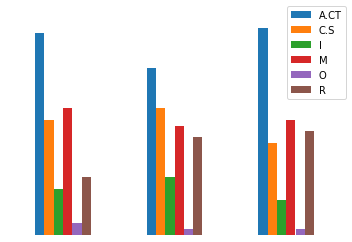

In [70]:
tipos_op_agrupado_category.unstack().plot(kind='bar')
# fig, ax = plt.subplots()
# ax.axis("off")

plt.legend(["A.CT","C.S","I","M","O","R"],bbox_to_anchor = (0.82, 0.6))
plt.ylabel("Percentage of operations")
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xticks(rotation=360)

# ax.spines['right'].set_visible(False)
plt.axis('off')
plt.show()


In [71]:
df_graph=df_tipo.groupby("Category")['Type'].value_counts().to_frame()
df_graph.reset_index(level=0, inplace=True)

In [72]:
df_graph=df_graph.rename(columns={"Type": "Percentages"})

In [73]:
df_graph.reset_index(level=0, inplace=True)

In [74]:
tam_grupos=df_graph.groupby("Category").apply(lambda x: sum(x['Percentages']))
tam_grupos

Category
Academic        179
Professional    494
Student         275
dtype: int64

In [75]:
tam_grupos["Student"]

275

In [76]:
listaNueva=[]
for row in df_graph.iterrows():
    tam=tam_grupos[row[1]['Category']]
    new_per=row[1]['Percentages']/tam
    listaNueva.append(new_per)

In [77]:
df_graph['Percentages']=listaNueva
df_graph['Percentages']=df_graph['Percentages']*100
df_graph

,Type,Category,Percentages
0,Analyze Time,Academic,35.754190
1,Manipulation,Academic,22.905028
2,Calculate statistics,Academic,20.111732
3,Representation,Academic,10.055866
4,Identification,Academic,8.379888
5,Others,Academic,2.793296
6,Analyze Time,Professional,29.149798
7,Calculate statistics,Professional,22.267206
8,Manipulation,Professional,19.230769
9,Representation,Professional,17.408907


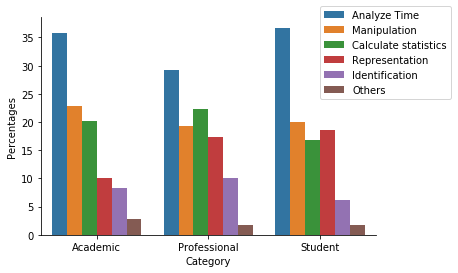

In [94]:
ax = sns.barplot(x="Category", y="Percentages", hue="Type", data=df_graph)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(bbox_to_anchor = (0.82, 0.6))
# plt.savefig('categoriesPercentages2.pdf')

In [79]:
tipos_op_agrupado_category.unstack()

Type,Analyze Time,Calculate statistics,Identification,Manipulation,Others,Representation
Category,,,,,,
Academic,35,20,8,22,2,10
Professional,29,22,10,19,1,17
Student,36,16,6,20,1,18


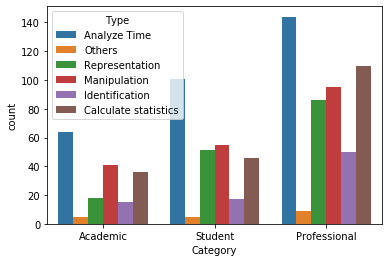

In [81]:
h = sns.countplot(x='Category', hue='Type' , data=df_tipo)

In [84]:
df = df_tipo
x, y, hue = "Category", "Type", "Type"
hue_order = ["Male", "Female"]

In [87]:
tipos_op_agrupado_category

Category      Type                
Academic      Analyze Time            35
              Manipulation            22
              Calculate statistics    20
              Representation          10
              Identification           8
              Others                   2
Professional  Analyze Time            29
              Calculate statistics    22
              Manipulation            19
              Representation          17
              Identification          10
              Others                   1
Student       Analyze Time            36
              Manipulation            20
              Representation          18
              Calculate statistics    16
              Identification           6
              Others                   1
Name: Type, dtype: int64

In [88]:
categories1=['Student','Professional','Academic']
categories2=['Student','Professional','Academic']
df = pd.DataFrame(index=['Student','Professional','Academic'],columns=['Student','Professional','Academic'])
for category1 in categories1:
    operationsCategory1=df_tipo[df_tipo["Category"]==category1]
    listaCoincidencias=[]
    for category2 in categories2:
        operationsCategory2=df_tipo[df_tipo["Category"]==category2]
        intersec=len(list(set(operationsCategory1["concept:name"]).intersection(set(operationsCategory2["concept:name"]))))
        if(category1==category2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df[category1]=listaCoincidencias

In [20]:
df

,Student,Professional,Academic
Student,0,28,19
Professional,28,0,23
Academic,19,23,0


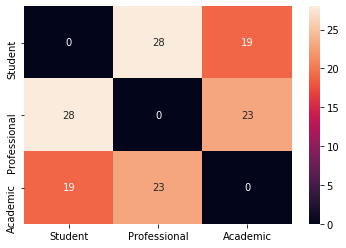

In [89]:
sns.heatmap(df, annot=True)

In [92]:
categories1=['Student','Professional','Academic']
categories2=['Student','Professional','Academic']
df2 = pd.DataFrame(index=['Student','Professional','Academic'],columns=['Student','Professional','Academic'])
for category1 in categories1:
    operationsCategory1=df_tipo[df_tipo["Category"]==category1]
    listaCoincidencias=[]
    for category2 in categories2:
        operationsCategory2=df_tipo[df_tipo["Category"]==category2]
        intersec=len(list(set(operationsCategory1["Variant"]).intersection(set(operationsCategory2["Variant"]))))
        if(category1==category2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df2[category1]=listaCoincidencias

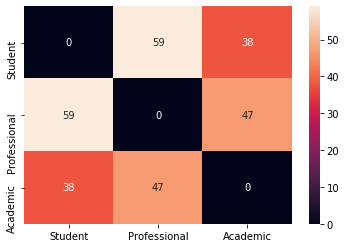

In [93]:
sns.heatmap(df2, annot=True)